# Final Project: Statistical Analysis of Student Performance

## Project Scenario

You are a teacher conducting a study on factors influencing student performance in exams. You have obtained the "Student Performance" dataset from Kaggle, which contains information about students' demographics and their scores in different subjects. Your task is to analyze the data, identify patterns, and draw conclusions about factors affecting student performance.

Dataset Link: [Student Performance Dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Instructions

You are required to perform the following analyses and answer the questions using the data provided.

In [1]:
# make venv in the first
# python -m venv statistics
#statistics\Scripts\activate
# pip install (python package)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#extera part ------ Basic information
data.info()
data.isnull().sum()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# 1. Basic Statistical Analysis
Calculate the mean and standard deviation for the math score, reading score, and writing score columns.

In [4]:
# Calculate mean
math_mean = np.mean(data['math score'])
reading_mean = np.mean(data['reading score'])
writing_mean = np.mean(data['writing score'])

# Calculate standard deviation
math_std = np.std(data['math score'])
reading_std = np.std(data['reading score'])
writing_std = np.std(data['writing score'])

print(f"Mean Math Score: {math_mean}, Std: {math_std}")
print(f"Mean Reading Score: {reading_mean}, Std: {reading_std}")
print(f"Mean Writing Score: {writing_mean}, Std: {writing_std}")

Mean Math Score: 66.089, Std: 15.155496659628149
Mean Reading Score: 69.169, Std: 14.592890015346516
Mean Writing Score: 68.054, Std: 15.188057281956768


# 2. Probabilities

Calculate the probability that a student is Male or has a Math_Score above 80.

In [5]:
# Calculate probabilities
data_one = pd.get_dummies(data['gender'])
data_1=data.copy()
data_1['gender_male']=data_one['male']
#------------------------------------------
p_male = (np.sum(data_one['male'])/(len(data)))
p_math_above_80 = np.count_nonzero(data['math score']>80)/len(data)
p_male_and_math_above_80 = np.sum((data_1['gender_male']) & (data_1['math score']>80))/len(data)

# Union probability
#P(A or B) = P(A)+P(B)-P(A and B)
p_union =p_male+p_math_above_80-p_male_and_math_above_80
print(f"Probability of Male or Math Score > 80: {p_union}")

Probability of Male or Math Score > 80: 0.5499999999999999


Calculate the probability that a student is Male and has a Math_Score above 80.

In [6]:
# Calculate probabilities
p_male = (np.sum(data_one['male'])/(len(data)))
p_math_above_80 = np.count_nonzero(data['math score']>80)/len(data)
p_male_and_math_above_80 = np.sum((data_1['gender_male']) & (data_1['math score']>80))/len(data)

# Union probability
# P(A and B)
p_intersection = p_male_and_math_above_80
print(f"Probability of Male and Math Score > 80: {p_intersection}")

Probability of Male and Math Score > 80: 0.108


### Bayes' Theorem
Calculate the probability that a student is Male given they have a Math_Score above 80.

In [7]:
# Calculate conditional probability using Bayes' theorem
# P(A|B)= P(A and B)/P(B)
p_male_given_math_above_80 = p_male_and_math_above_80 / p_math_above_80
print(f"Probability of Male given Math Score > 80: {p_male_given_math_above_80}")

Probability of Male given Math Score > 80: 0.6136363636363636


# 3. Normal Distribution
Check Normality
Use QQ plot, histogram, and Shapiro-Wilk test to check if Math_Score is normally distributed.

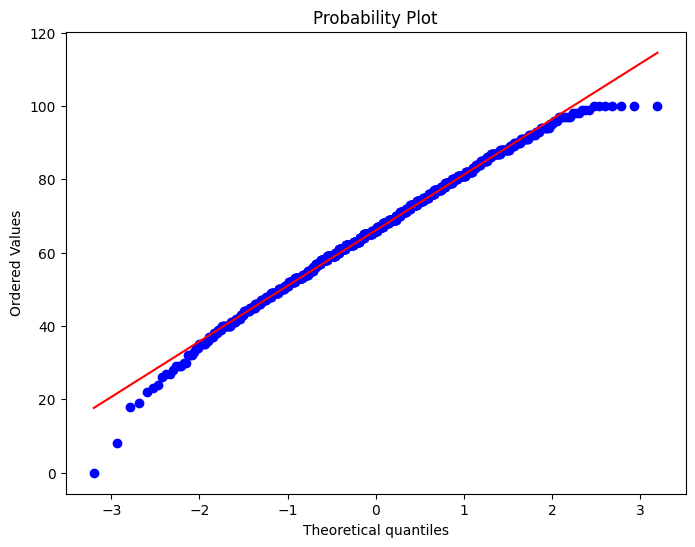

In [8]:
# QQ plot
math_score= data['math score']
plt.figure(figsize=(8,6))
stats.probplot(math_score,dist='norm',plot=plt)
plt.show()

# TO DO

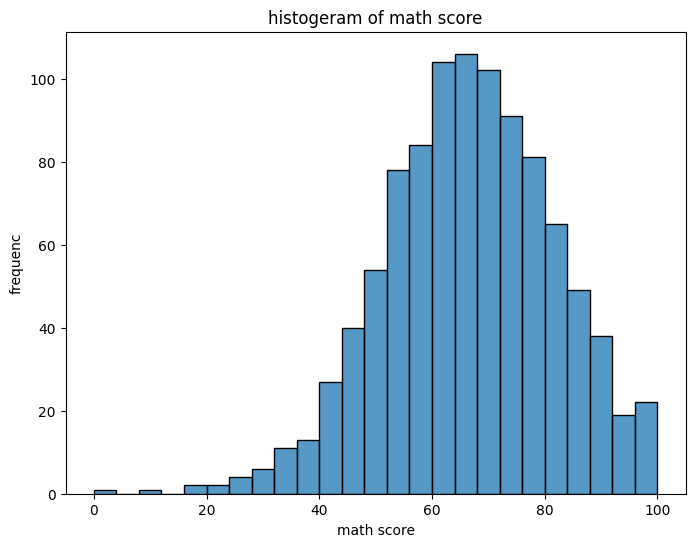

In [9]:
# Histogram
plt.figure(figsize=(8,6))
sns.histplot(math_score)
plt.title("histogeram of math score")
plt.xlabel("math score")
plt.ylabel("frequenc")
plt.show()

In [10]:
statistic, p_value = stats.shapiro(math_score)
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

Shapiro-Wilk Test for Math Score: Statistic = 0.9931513872437832, p-value = 0.00014545719606603633
T-statistic: 0.9931513872437832, p-value: 0.00014545719606603633


In [11]:
# Shapiro-Wilk test

statistic, p_value = stats.shapiro(math_score)
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
# standard of alpha is 0.05
alpha = 0.05
if p_value < alpha:
    print( "data is Normally distributed" )
else:
    print( "data isNOT Normally distributed")

Shapiro-Wilk Test for Math Score: Statistic = 0.9931513872437832, p-value = 0.00014545719606603633
T-statistic: 0.9931513872437832, p-value: 0.00014545719606603633
data is Normally distributed


# 4. Z-Score and Noise Removal

Calculate the z-scores for the Math_Score column and remove noise (more than 95%).


Original data size: (1000, 9)
Cleaned data size: (949, 9)


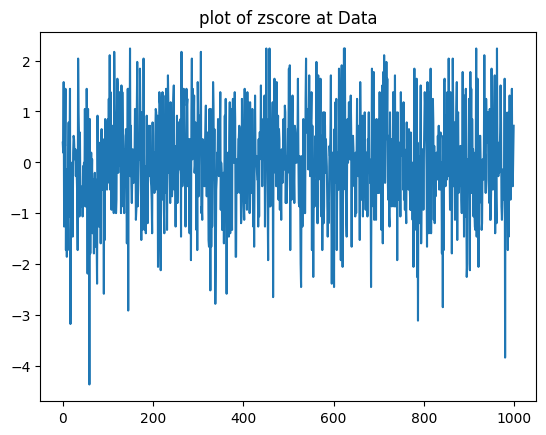

In [12]:
data['Math_Score_z'] = (data['math score'] - np.mean(data['math score']))/np.std(data['math score'])
data['Math_Score_z'] 
thereshold=1.96
cleaned_data =data[(data['Math_Score_z'] <= thereshold) & (data['Math_Score_z'] >= -thereshold)]
print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {cleaned_data.shape}")
plt.plot(data['Math_Score_z'])
plt.title("plot of zscore at Data")
plt.show()

In [13]:
# Calculate z-scores
#z_score = (x-mean)/std
data['Math_Score_z'] = (data['math score'] - np.mean(data['math score']))/np.std(data['math score'])

# Remove noise
# alpha = 0.05 : for alpha 0.05 thershold is 1.96
thereshold=1.96
cleaned_data =data[(data['Math_Score_z'] <= thereshold) & (data['Math_Score_z'] >= -thereshold)]
print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {cleaned_data.shape}")

Original data size: (1000, 9)
Cleaned data size: (949, 9)


# 5. Visualizations
Generate different plots (box, histogram, scatter, pie) to visualize Math Score column before and after removing noise.

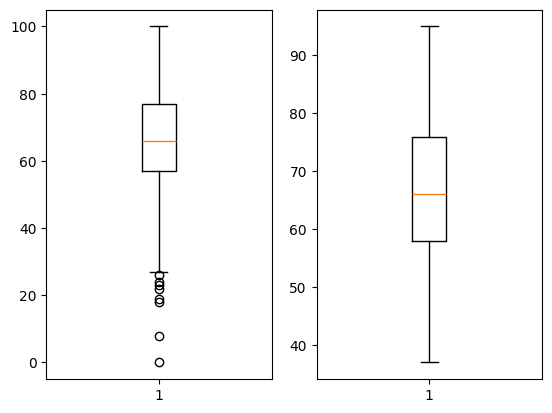

In [15]:
# Box plot
plt.subplot(1,2,1)
plt.boxplot(data['math score'])
plt.subplot(1,2,2)
plt.boxplot(cleaned_data['math score'])
plt.show()
# TO DO

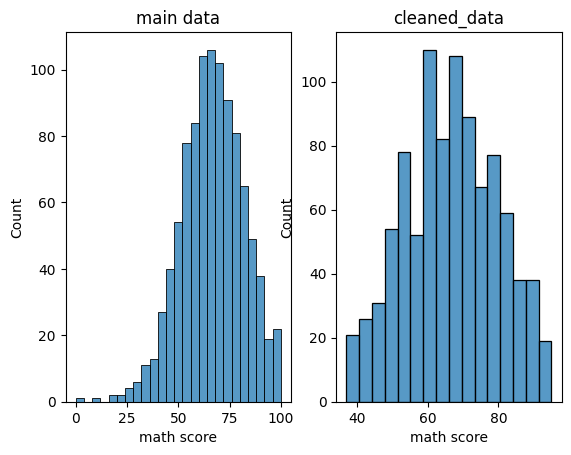

In [17]:
# Histogram
plt.subplot(1,2,1)
sns.histplot(data['math score'])
plt.title("main data")
plt.subplot(1,2,2)
sns.histplot(cleaned_data['math score'])
plt.title("cleaned_data")
plt.show()



# TO DO

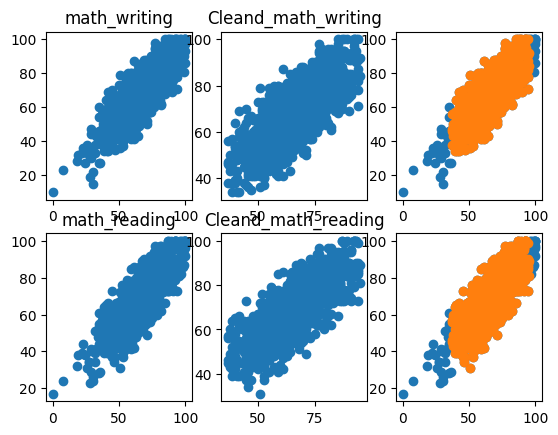

In [18]:
# Scatter plot
x1=data['math score']
y1=data['writing score']
x2=cleaned_data['math score']
y2=cleaned_data['writing score']
plt.subplot(2,3,1)
plt.scatter(x1,y1)
plt.title ("math_writing")
plt.subplot(2,3,2)
plt.scatter(x2,y2)
plt.title ("Cleand_math_writing")

plt.subplot(2,3,3)
plt.scatter(x1,y1)
plt.subplot(2,3,3)
plt.scatter(x2,y2)

#----------------------------------------
x3=data['math score']
y3=data['reading score']
x4=cleaned_data['math score']
y4=cleaned_data['reading score']
plt.subplot(2,3,4)
plt.scatter(x3,y3)
plt.title ("math_reading")
plt.subplot(2,3,5)
plt.scatter(x4,y4)
plt.title ("Cleand_math_reading")

plt.subplot(2,3,6)
plt.scatter(x3,y3)
plt.subplot(2,3,6)
plt.scatter(x4,y4)

plt.show()
# TO DO

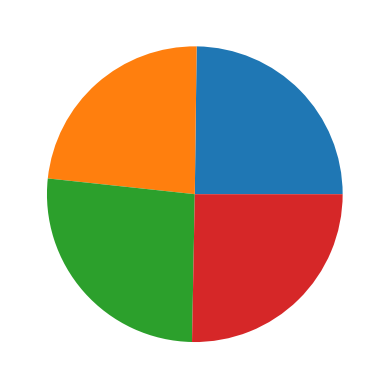

In [43]:
min_data=np.min(data['math score'])
max_data=np.max(data['math score'])
Q1=np.quantile(data['math score'],0.25)
Q2=np.quantile(data['math score'],0.5)
Q3=np.quantile(data['math score'],0.75)
bins=["min_Q1",'Q1-Q2','q2_Q3','q3_max']
x1=np.count_nonzero((data['math score']>=min_data) &(data['math score']<Q1) )
x2=np.count_nonzero((data['math score']>=Q1) &(data['math score']<Q2) )
x3=np.count_nonzero((data['math score']>=Q2) &(data['math score']<Q3) )
x4=np.count_nonzero((data['math score']>=Q3) &(data['math score']<=max_data) )
X=np.array([x1,x2,x3,x4])
plt.pie(X)
plt.show()

[  2   2  10  26  95 188 268 216 135  58]


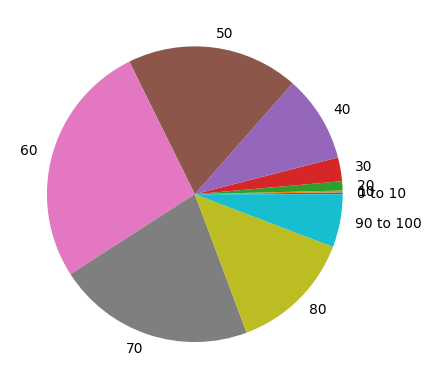

In [59]:
# extera Pie chart
# make math_score_part: 10,20,30,...,(90 and 100)
math_score_part=np.array([0,0,0,0,0,0,0,0,0,0])
for i in range(len(data)):
    part=int(data['math score'][i]//10)
    if part==10:
        # if math_score =100 : part=9
        math_score_part[9]+=1
    else:
        math_score_part[part]+=1
print (math_score_part)
mylabels=('0 to 10','10','20','30','40','50','60','70','80','90 to 100')
plt.pie(math_score_part,labels=mylabels)
plt.show()
# TO DO

# 6. Parametric Hypothesis Testing

### Two samples
Perform a two-sample hypothesis test to compare the Math_Score between Male and Female students. (use cleaned data and choose  appropriate test)

In [24]:
male_math_score = cleaned_data[cleaned_data['gender'] == 'male']['math score']
female_math_score = cleaned_data[cleaned_data['gender'] == 'female']['math score']

In [25]:
male_math_score = cleaned_data[cleaned_data['gender'] == 'male']['math score']
female_math_score = cleaned_data[cleaned_data['gender'] == 'female']['math score']

t_statistic, p_value = stats.ttest_ind(male_math_score,female_math_score)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "reject null Hypothesis. there is a significan diffrent between male_math_score and female_math_score " )
else:
    print( "fail to reject the null Hypothesis")

T-statistic: 4.519758747729613, p-value: 6.974001649329355e-06
reject null Hypothesis. there is a significan diffrent between male_math_score and female_math_score 


### 3 Samples or More
Perform an hypothesis test to compare the Math_Score across different ethnicities.

In [33]:
A = cleaned_data[cleaned_data['race/ethnicity'] == 'group A']['math score']
B = cleaned_data[cleaned_data['race/ethnicity'] == 'group B']['math score']
C = cleaned_data[cleaned_data['race/ethnicity'] == 'group C']['math score']

AB_t_statistic, AB_p_value = stats.ttest_ind(A,B)
AC_t_statistic, AC_p_value = stats.ttest_ind(A,C)
BC_t_statistic, BC_p_value = stats.ttest_ind(B,C)
print(AB_p_value,AC_p_value,BC_p_value)

alpha = 0.05
if AB_p_value < alpha:
    print( "AB _ reject null Hypothesis. there is a significan diffrent between male_math_score and female_math_score " )
else:
    print( "AB _ fail to reject the null Hypothesis")
if AC_p_value < alpha:
    print( "AC _ reject null Hypothesis. there is a significan diffrent between male_math_score and female_math_score " )
else:
    print( "AC _ fail to reject the null Hypothesis")
if BC_p_value < alpha:
    print( "BC _ reject null Hypothesis. there is a significan diffrent between male_math_score and female_math_score " )
else:
    print( "BC _ fail to reject the null Hypothesis")

0.038919950353141365 0.012943073142100081 0.7921627334146479
AB _ reject null Hypothesis. there is a significan diffrent between male_math_score and female_math_score 
AC _ reject null Hypothesis. there is a significan diffrent between male_math_score and female_math_score 
BC _ fail to reject the null Hypothesis


# 7. Confidence Interval

Calculate a 95% confidence interval for the mean Math_Score.

95% Confidence interval for mean Math Score: 0.95


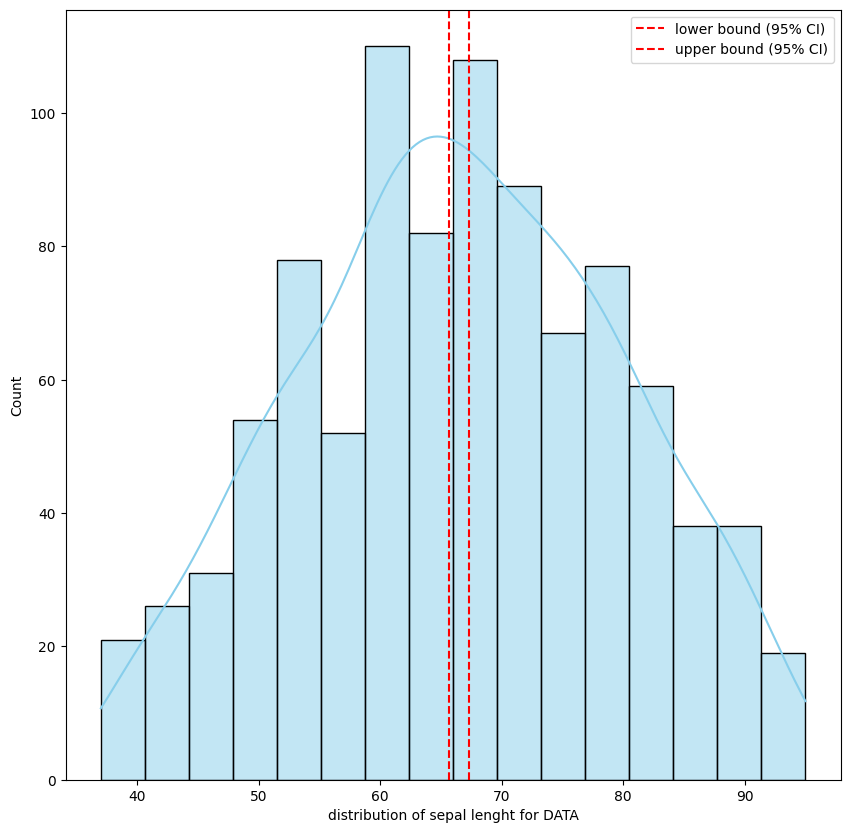

In [58]:
mean_cleaned_data=np.mean(cleaned_data['math score'])
std_cleaned_data=np.std(cleaned_data['math score'],ddof=1)
n= len(cleaned_data['math score'])
confidence_interval=0.95
z=stats.norm.ppf(1 - (1 - confidence_interval)/2)
standard_erroe = std_cleaned_data / np.sqrt(n)
lower_bound = mean_cleaned_data - z * standard_erroe
upper_bound = mean_cleaned_data + z * standard_erroe
print(f"95% Confidence interval for mean Math Score: {confidence_interval}")
plt.figure(figsize=(10,10))
sns.histplot(cleaned_data['math score'], kde=True, color='skyblue')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='lower bound (95% CI)')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='upper bound (95% CI)')
plt.xlabel ("distribution of sepal lenght for DATA")
plt.legend()
plt.show()
